In [1]:
# Imports.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

tfd = tf.contrib.distributions

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
# Model & Plotting.

neurons = 256

# Encoder.
def make_encoder(data, code_size):
    x = tf.layers.flatten(data)
    h1 = tf.layers.dense(x, neurons, tf.nn.relu)
    h2 = tf.layers.dense(h1, neurons, tf.nn.relu)
    loc = tf.layers.dense(h2, code_size, tf.nn.tanh)
    scl = tf.layers.dense(h2, code_size, tf.nn.softplus)
    return tfd.MultivariateNormalDiag(loc, scl)

# Prior.
def make_prior(code_size):
    loc = tf.zeros(code_size)
    scl = tf.ones(code_size)
    return tfd.MultivariateNormalDiag(loc, scl)

# Decoder
def make_decoder(code, data_shape):
    x = code
    h1 = tf.layers.dense(x, neurons, tf.nn.relu)
    h2 = tf.layers.dense(h1, neurons, tf.nn.relu)
    loc = tf.layers.dense(h2, np.prod(data_shape), tf.nn.softplus)
    scl = tf.layers.dense(h2, np.prod(data_shape), tf.nn.softplus)
    
    return loc, scl

# Optimisation
make_encoder = tf.make_template('encoder', make_encoder)
make_decoder = tf.make_template('decoder', make_decoder)

In [3]:
# Dataset retrieval.
X_train = np.load('FireEvac_train_set.npy')
X_test = np.load('FireEvac_test_set.npy')


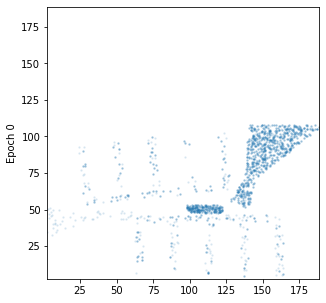

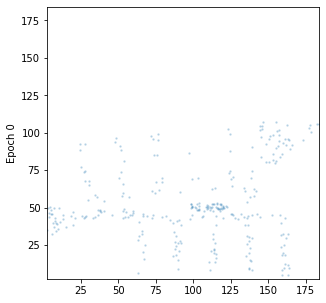

In [4]:
# Plotting.
def plot(epoch, codes, size=2):
    ig, ax = plt.subplots(ncols=1, figsize=(size, size))
    no_ticks = dict(left='off', bottom='off', labelleft='off', labelbottom='off')
    ax.set_ylabel('Epoch {}'.format(epoch))
    ax.scatter(codes[:, 0], codes[:, 1], s=2, alpha=0.1)
    ax.set_aspect('equal')
    ax.set_xlim(codes.min() - .1, codes.max() + .1)
    ax.set_ylim(codes.min() - .1, codes.max() + .1)
    ax.tick_params(axis='both', which='both', **no_ticks)
    plt.show()
    
plot(0, X_train, size=5)
plot(0, X_test, size=5)

In [5]:
data = tf.placeholder(tf.float32, [None, 2])

cs = 10

# Define the model.
prior = make_prior(code_size=cs)
posterior = make_encoder(data, code_size=cs)
code = posterior.sample()

# Define the loss.
loc, scl = make_decoder(code, [2])

mvn = tfd.Independent(tfd.MultivariateNormalDiag(loc, scl))
likelihood = mvn.log_prob(data)

divergence = tfd.kl_divergence(posterior, prior)
elbo = tf.reduce_mean(likelihood - 1*divergence)
optimize = tf.train.AdamOptimizer(0.001).minimize(-elbo)

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlo

Epoch 0 elbo -6754.639


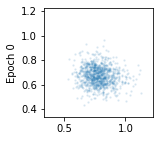

Reconstruction:


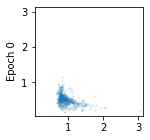

Epoch 1 elbo -13.68451


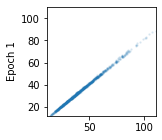

Reconstruction:


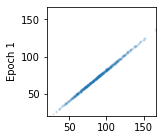

Epoch 2 elbo -12.753678


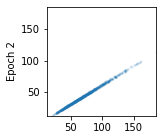

Reconstruction:


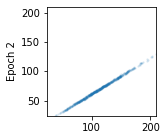

Epoch 3 elbo -11.8017645


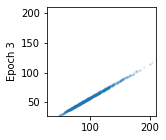

Reconstruction:


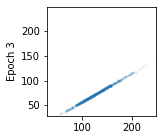

Epoch 4 elbo -10.664105


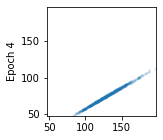

Reconstruction:


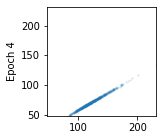

Epoch 5 elbo -10.772287


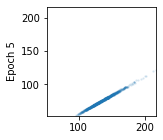

Reconstruction:


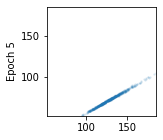

Epoch 6 elbo -10.887809


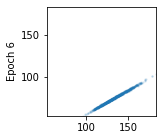

Reconstruction:


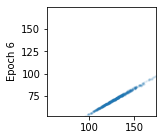

Epoch 7 elbo -10.923509


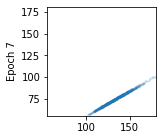

Reconstruction:


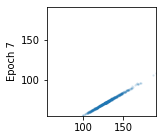

Epoch 8 elbo -10.883298


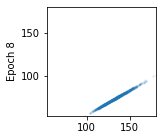

Reconstruction:


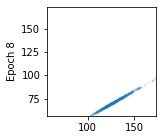

Epoch 9 elbo -10.935166


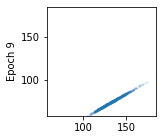

Reconstruction:


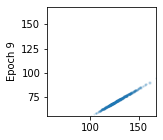

Epoch 10 elbo -10.922083


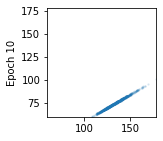

Reconstruction:


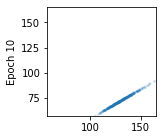

Epoch 11 elbo -10.964091


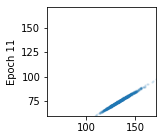

Reconstruction:


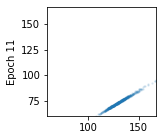

Epoch 12 elbo -10.956891


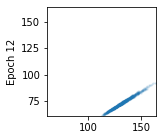

Reconstruction:


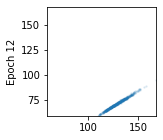

Epoch 13 elbo -11.02051


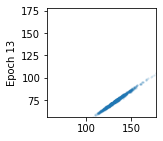

Reconstruction:


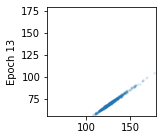

Epoch 14 elbo -11.016982


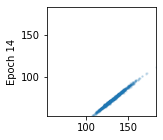

Reconstruction:


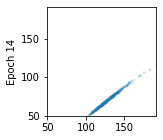

Epoch 15 elbo -10.739486


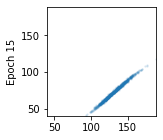

Reconstruction:


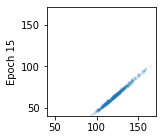

Epoch 16 elbo -10.63175


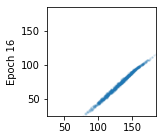

Reconstruction:


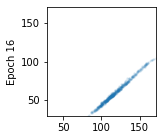

Epoch 17 elbo -10.82308


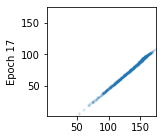

Reconstruction:


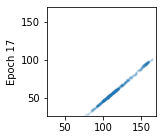

Epoch 18 elbo -10.554302


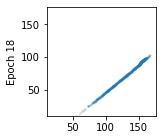

Reconstruction:


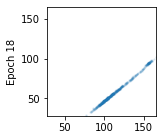

Epoch 19 elbo -10.661055


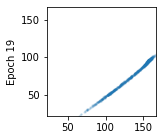

Reconstruction:


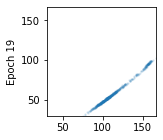

Epoch 20 elbo -10.579682


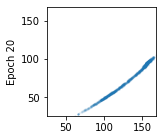

Reconstruction:


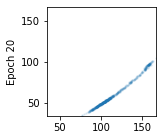

Epoch 21 elbo -10.578479


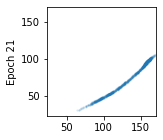

Reconstruction:


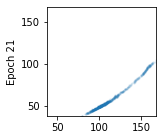

Epoch 22 elbo -10.610075


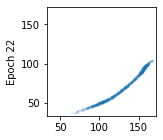

Reconstruction:


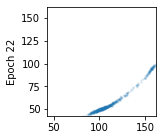

Epoch 23 elbo -10.627076


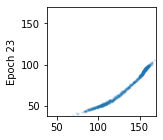

Reconstruction:


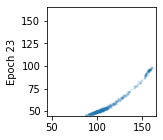

Epoch 24 elbo -10.497516


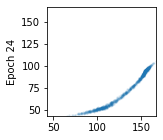

Reconstruction:


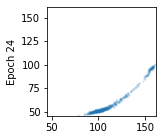

Epoch 25 elbo -10.555464


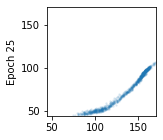

Reconstruction:


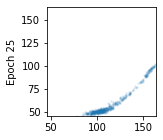

Epoch 26 elbo -10.540355


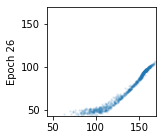

Reconstruction:


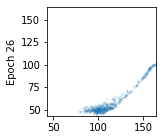

Epoch 27 elbo -10.557558


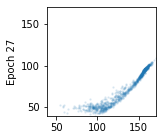

Reconstruction:


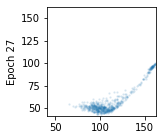

Epoch 28 elbo -10.672205


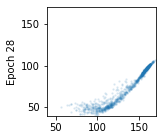

Reconstruction:


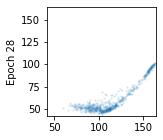

Epoch 29 elbo -10.650636


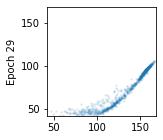

Reconstruction:


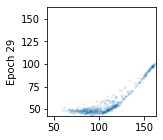

Epoch 30 elbo -10.692214


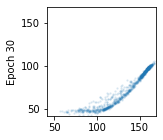

Reconstruction:


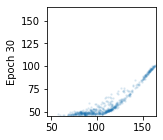

Epoch 31 elbo -10.482628


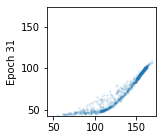

Reconstruction:


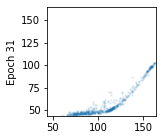

Epoch 32 elbo -10.591463


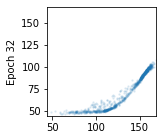

Reconstruction:


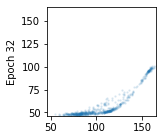

Epoch 33 elbo -10.512619


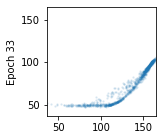

Reconstruction:


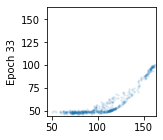

Epoch 34 elbo -10.674759


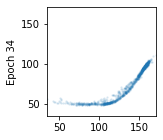

Reconstruction:


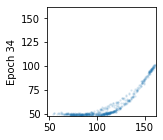

Epoch 35 elbo -10.576962


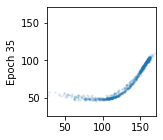

Reconstruction:


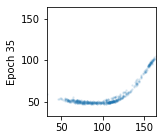

Epoch 36 elbo -10.463202


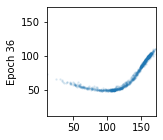

Reconstruction:


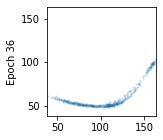

Epoch 37 elbo -10.456885


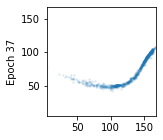

Reconstruction:


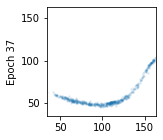

Epoch 38 elbo -10.447347


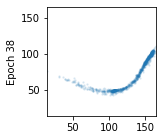

Reconstruction:


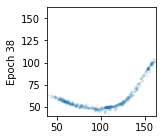

Epoch 39 elbo -10.565866


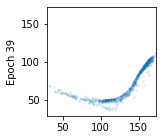

Reconstruction:


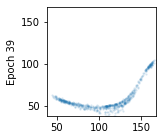

Epoch 40 elbo -10.54891


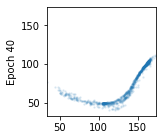

Reconstruction:


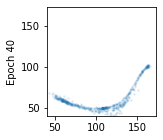

Epoch 41 elbo -10.379387


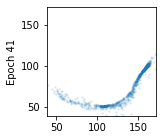

Reconstruction:


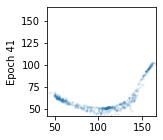

Epoch 42 elbo -10.3171215


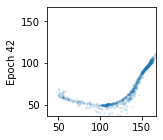

Reconstruction:


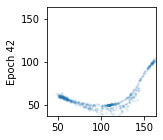

Epoch 43 elbo -10.458628


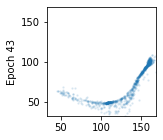

Reconstruction:


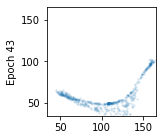

Epoch 44 elbo -10.407388


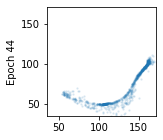

Reconstruction:


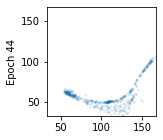

Epoch 45 elbo -10.415582


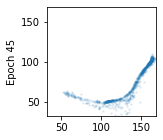

Reconstruction:


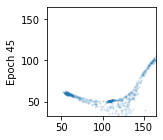

Epoch 46 elbo -10.371672


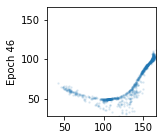

Reconstruction:


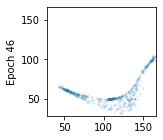

Epoch 47 elbo -10.583777


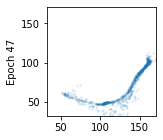

Reconstruction:


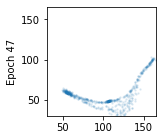

Epoch 48 elbo -10.457938


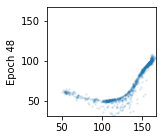

Reconstruction:


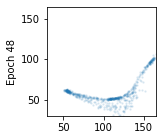

Epoch 49 elbo -10.415257


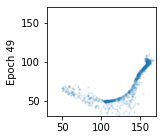

Reconstruction:


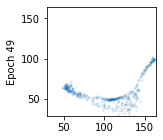

Epoch 50 elbo -10.456999


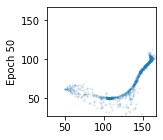

Reconstruction:


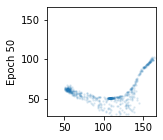

Epoch 51 elbo -10.45757


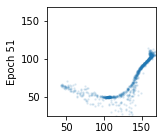

Reconstruction:


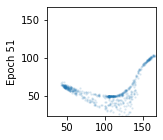

Epoch 52 elbo -10.324754


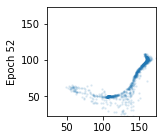

Reconstruction:


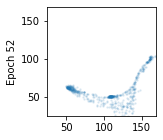

Epoch 53 elbo -10.460417


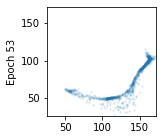

Reconstruction:


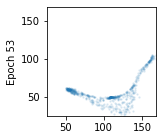

Epoch 54 elbo -10.389114


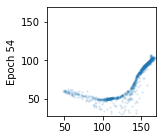

Reconstruction:


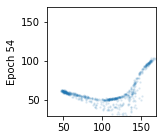

Epoch 55 elbo -10.463959


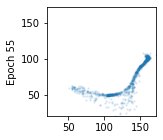

Reconstruction:


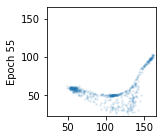

Epoch 56 elbo -10.590967


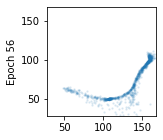

Reconstruction:


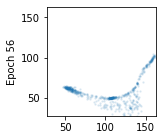

Epoch 57 elbo -10.374755


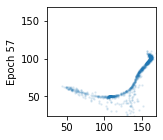

Reconstruction:


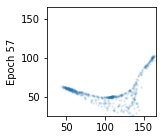

Epoch 58 elbo -10.378253


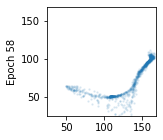

Reconstruction:


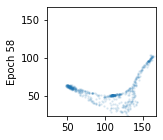

Epoch 59 elbo -10.452114


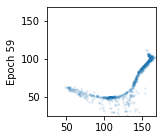

Reconstruction:


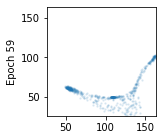

Epoch 60 elbo -10.45163


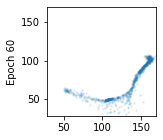

Reconstruction:


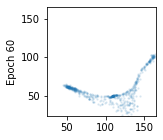

Epoch 61 elbo -10.346423


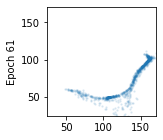

Reconstruction:


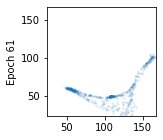

Epoch 62 elbo -10.558117


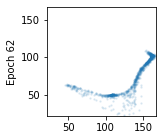

Reconstruction:


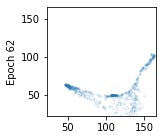

Epoch 63 elbo -10.390832


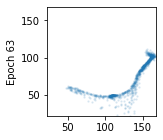

Reconstruction:


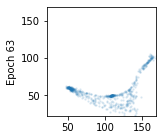

Epoch 64 elbo -10.465662


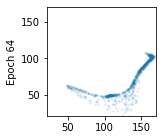

Reconstruction:


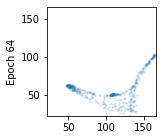

Epoch 65 elbo -10.500451


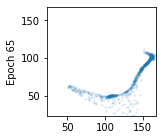

Reconstruction:


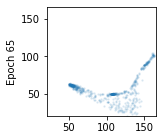

Epoch 66 elbo -10.516167


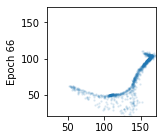

Reconstruction:


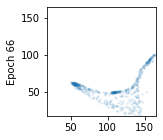

Epoch 67 elbo -10.577456


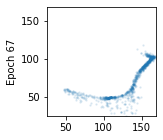

Reconstruction:


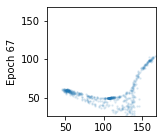

Epoch 68 elbo -10.478825


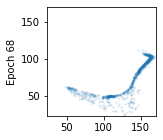

Reconstruction:


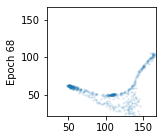

Epoch 69 elbo -10.404405


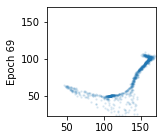

Reconstruction:


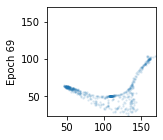

Epoch 70 elbo -10.493744


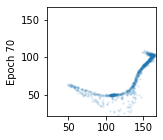

Reconstruction:


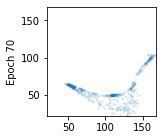

Epoch 71 elbo -10.382715


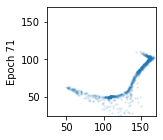

Reconstruction:


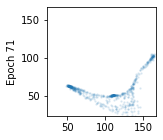

Epoch 72 elbo -10.463049


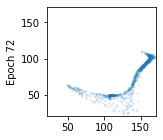

Reconstruction:


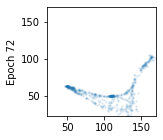

Epoch 73 elbo -10.489255


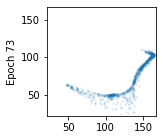

Reconstruction:


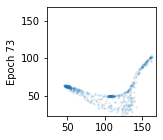

Epoch 74 elbo -10.421587


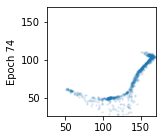

Reconstruction:


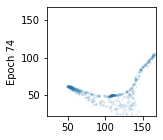

Epoch 75 elbo -10.39652


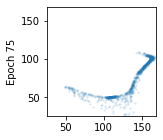

Reconstruction:


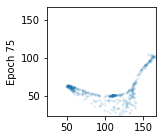

Epoch 76 elbo -10.757567


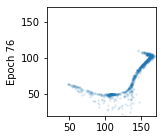

Reconstruction:


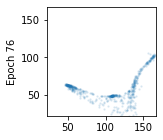

Epoch 77 elbo -10.454935


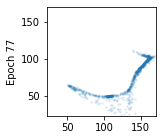

Reconstruction:


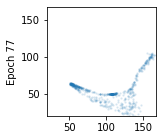

Epoch 78 elbo -10.477353


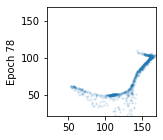

Reconstruction:


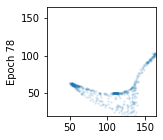

Epoch 79 elbo -10.474312


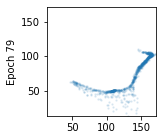

Reconstruction:


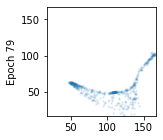

Epoch 80 elbo -10.376953


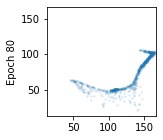

Reconstruction:


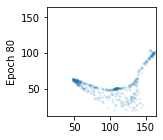

Epoch 81 elbo -10.457266


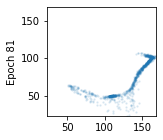

Reconstruction:


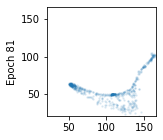

Epoch 82 elbo -10.387128


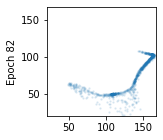

Reconstruction:


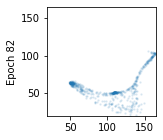

Epoch 83 elbo -10.377989


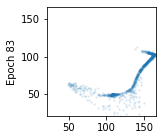

Reconstruction:


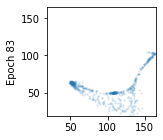

Epoch 84 elbo -10.434481


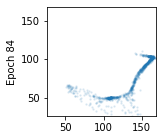

Reconstruction:


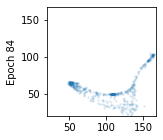

Epoch 85 elbo -10.480482


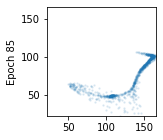

Reconstruction:


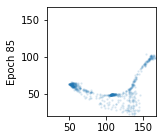

Epoch 86 elbo -10.347757


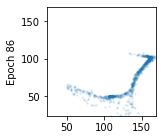

Reconstruction:


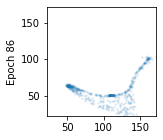

Epoch 87 elbo -10.443094


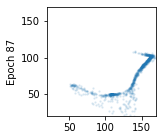

Reconstruction:


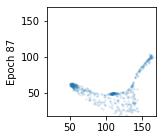

Epoch 88 elbo -10.308682


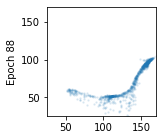

Reconstruction:


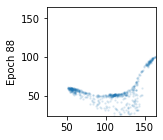

Epoch 89 elbo -10.342654


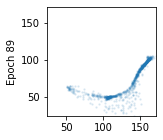

Reconstruction:


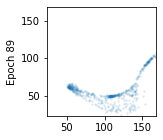

Epoch 90 elbo -10.402721


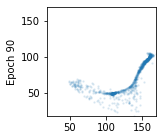

Reconstruction:


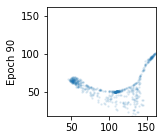

Epoch 91 elbo -10.355552


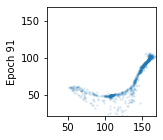

Reconstruction:


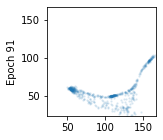

Epoch 92 elbo -10.396424


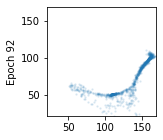

Reconstruction:


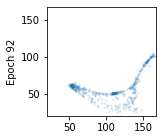

Epoch 93 elbo -10.357839


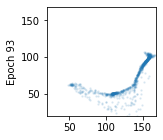

Reconstruction:


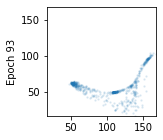

Epoch 94 elbo -10.464408


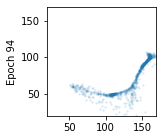

Reconstruction:


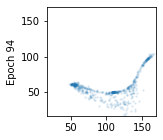

Epoch 95 elbo -10.368083


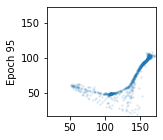

Reconstruction:


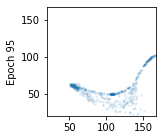

Epoch 96 elbo -10.32905


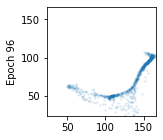

Reconstruction:


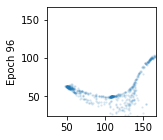

Epoch 97 elbo -10.331156


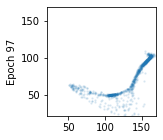

Reconstruction:


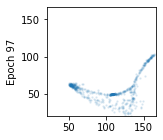

Epoch 98 elbo -10.392708


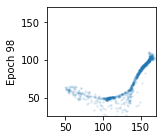

Reconstruction:


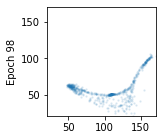

Epoch 99 elbo -10.333998


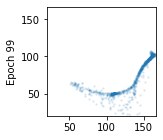

Reconstruction:


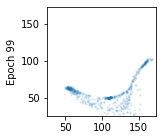

Epoch 100 elbo -10.387906


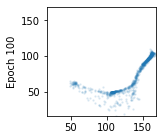

Reconstruction:


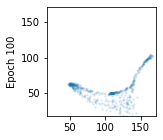

Epoch 101 elbo -10.34436


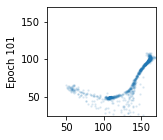

Reconstruction:


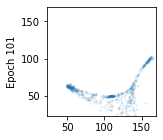

Epoch 102 elbo -10.36597


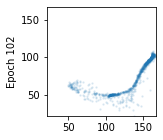

Reconstruction:


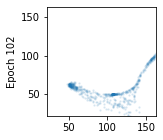

Epoch 103 elbo -10.293167


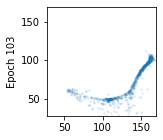

Reconstruction:


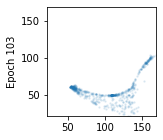

Epoch 104 elbo -10.356507


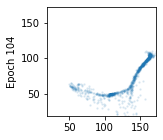

Reconstruction:


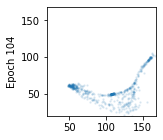

Epoch 105 elbo -10.423534


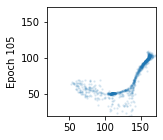

Reconstruction:


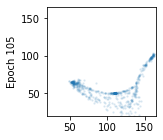

Epoch 106 elbo -10.360725


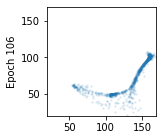

Reconstruction:


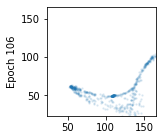

Epoch 107 elbo -10.385363


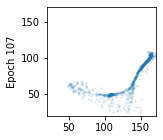

Reconstruction:


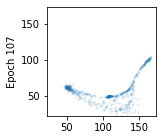

Epoch 108 elbo -10.483779


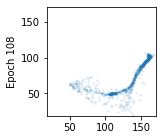

Reconstruction:


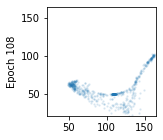

Epoch 109 elbo -10.338713


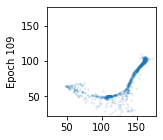

Reconstruction:


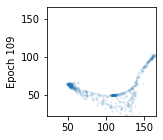

Epoch 110 elbo -10.515469


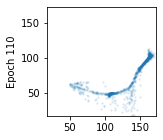

Reconstruction:


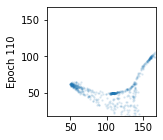

Epoch 111 elbo -10.338388


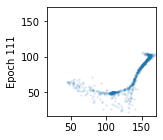

Reconstruction:


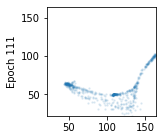

Epoch 112 elbo -10.427853


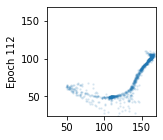

Reconstruction:


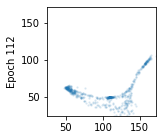

Epoch 113 elbo -10.466315


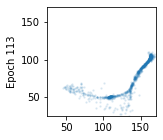

Reconstruction:


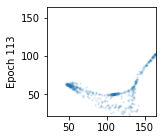

Epoch 114 elbo -10.369554


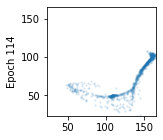

Reconstruction:


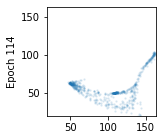

Epoch 115 elbo -10.390499


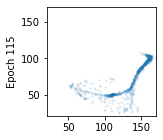

Reconstruction:


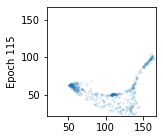

Epoch 116 elbo -10.376527


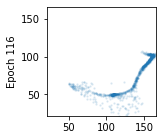

Reconstruction:


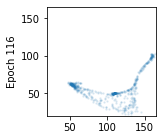

Epoch 117 elbo -10.443519


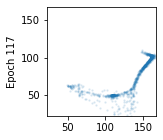

Reconstruction:


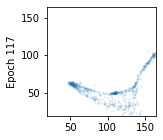

Epoch 118 elbo -10.416914


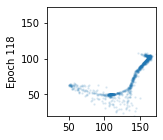

Reconstruction:


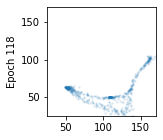

Epoch 119 elbo -10.373444


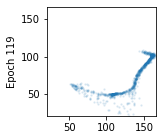

Reconstruction:


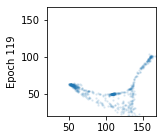

Epoch 120 elbo -10.458743


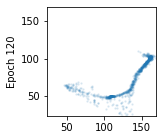

Reconstruction:


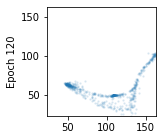

Epoch 121 elbo -10.389259


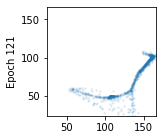

Reconstruction:


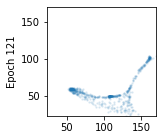

Epoch 122 elbo -10.522547


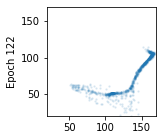

Reconstruction:


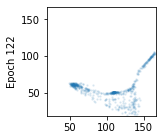

Epoch 123 elbo -10.414035


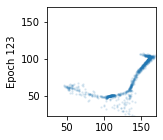

Reconstruction:


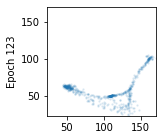

Epoch 124 elbo -10.437417


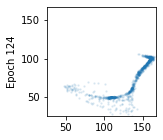

Reconstruction:


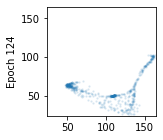

Epoch 125 elbo -10.360181


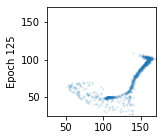

Reconstruction:


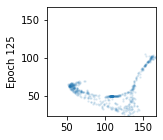

Epoch 126 elbo -10.454818


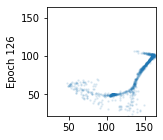

Reconstruction:


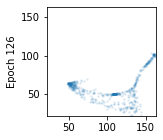

Epoch 127 elbo -10.411316


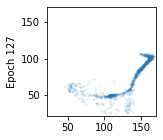

Reconstruction:


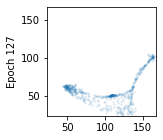

Epoch 128 elbo -10.360567


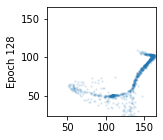

Reconstruction:


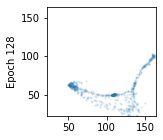

Epoch 129 elbo -10.381903


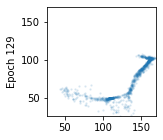

Reconstruction:


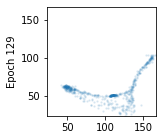

Epoch 130 elbo -10.470534


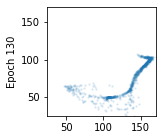

Reconstruction:


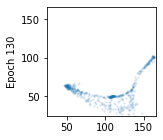

Epoch 131 elbo -10.336429


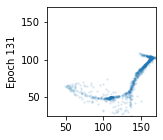

Reconstruction:


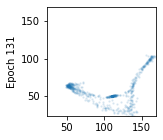

Epoch 132 elbo -10.494652


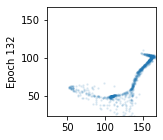

Reconstruction:


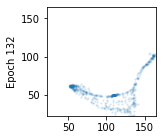

Epoch 133 elbo -10.41988


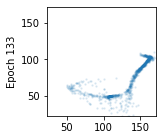

Reconstruction:


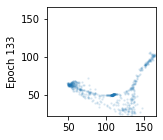

Epoch 134 elbo -10.474245


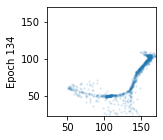

Reconstruction:


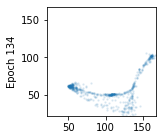

Epoch 135 elbo -10.490783


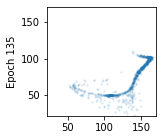

Reconstruction:


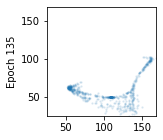

Epoch 136 elbo -10.429375


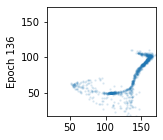

Reconstruction:


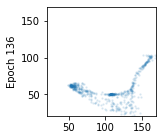

Epoch 137 elbo -10.318843


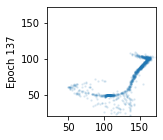

Reconstruction:


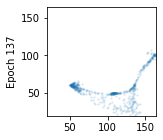

Epoch 138 elbo -10.406133


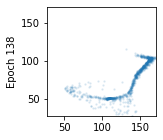

Reconstruction:


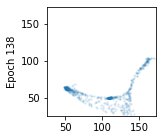

Epoch 139 elbo -10.4593525


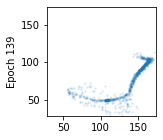

Reconstruction:


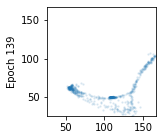

Epoch 140 elbo -10.474541


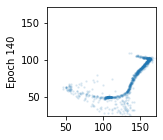

Reconstruction:


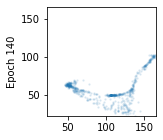

Epoch 141 elbo -10.371866


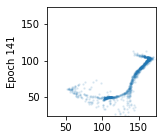

Reconstruction:


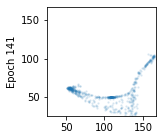

Epoch 142 elbo -10.440771


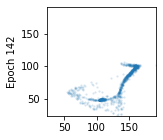

Reconstruction:


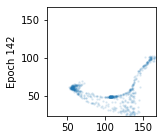

Epoch 143 elbo -10.415928


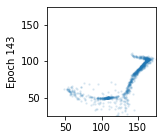

Reconstruction:


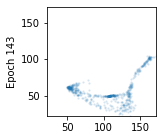

Epoch 144 elbo -10.418759


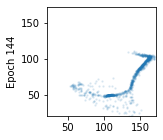

Reconstruction:


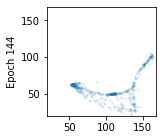

Epoch 145 elbo -10.511854


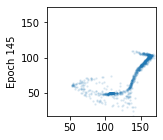

Reconstruction:


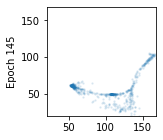

Epoch 146 elbo -10.451232


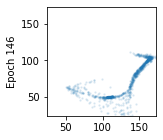

Reconstruction:


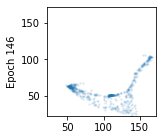

Epoch 147 elbo -10.38597


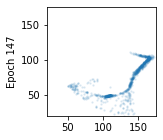

Reconstruction:


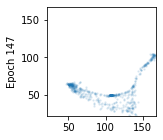

Epoch 148 elbo -10.390134


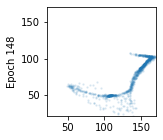

Reconstruction:


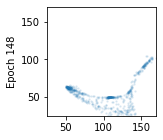

Epoch 149 elbo -10.42363


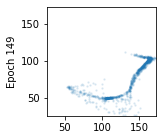

Reconstruction:


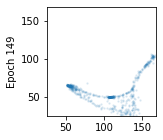

Epoch 150 elbo -10.436221


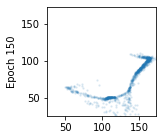

Reconstruction:


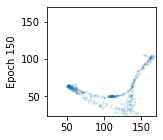

Epoch 151 elbo -10.42077


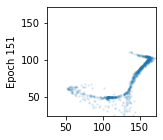

Reconstruction:


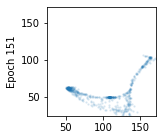

Epoch 152 elbo -10.4724655


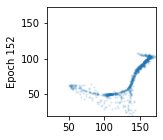

Reconstruction:


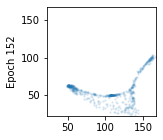

Epoch 153 elbo -10.362452


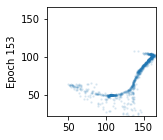

Reconstruction:


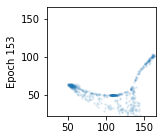

Epoch 154 elbo -10.437841


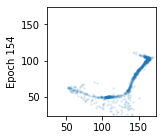

Reconstruction:


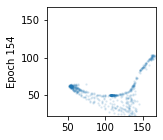

Epoch 155 elbo -10.484007


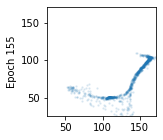

Reconstruction:


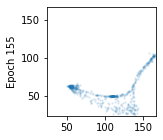

Epoch 156 elbo -10.37609


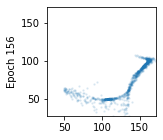

Reconstruction:


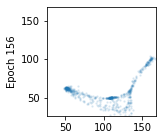

Epoch 157 elbo -10.340999


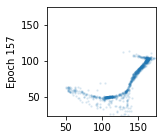

Reconstruction:


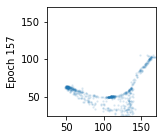

Epoch 158 elbo -10.482885


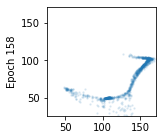

Reconstruction:


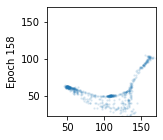

Epoch 159 elbo -10.49184


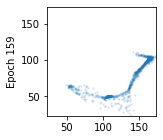

Reconstruction:


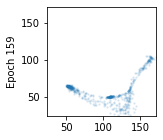

Epoch 160 elbo -10.40582


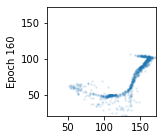

Reconstruction:


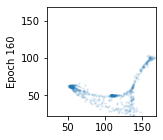

Epoch 161 elbo -10.520727


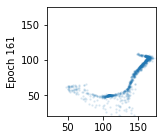

Reconstruction:


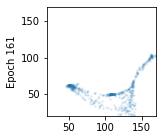

Epoch 162 elbo -10.407381


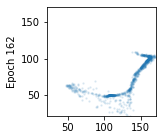

Reconstruction:


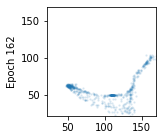

Epoch 163 elbo -10.343486


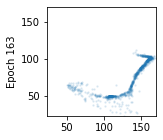

Reconstruction:


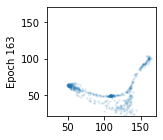

Epoch 164 elbo -10.4354315


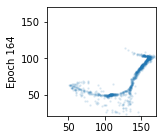

Reconstruction:


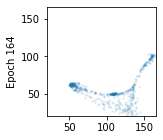

Epoch 165 elbo -10.412776


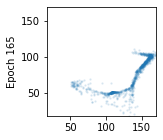

Reconstruction:


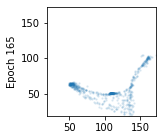

Epoch 166 elbo -10.46671


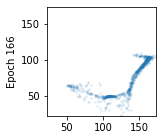

Reconstruction:


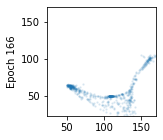

Epoch 167 elbo -10.616339


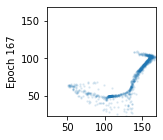

Reconstruction:


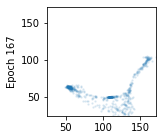

Epoch 168 elbo -10.354125


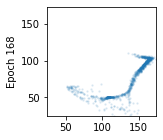

Reconstruction:


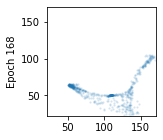

Epoch 169 elbo -10.3840885


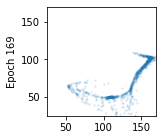

Reconstruction:


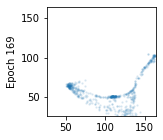

Epoch 170 elbo -10.331088


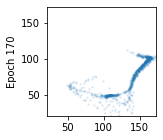

Reconstruction:


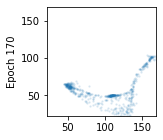

Epoch 171 elbo -10.399957


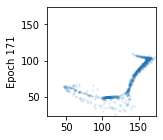

Reconstruction:


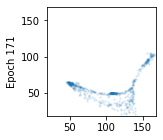

Epoch 172 elbo -10.360506


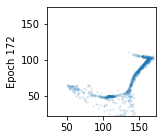

Reconstruction:


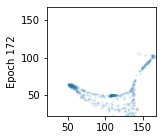

Epoch 173 elbo -10.433749


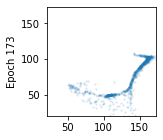

Reconstruction:


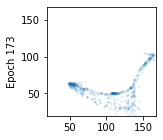

Epoch 174 elbo -10.299193


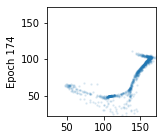

Reconstruction:


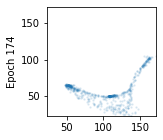

Epoch 175 elbo -10.367447


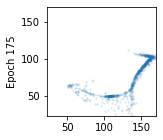

Reconstruction:


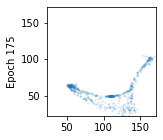

Epoch 176 elbo -10.433582


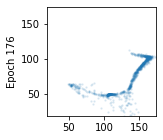

Reconstruction:


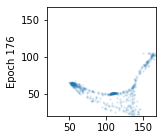

Epoch 177 elbo -10.450358


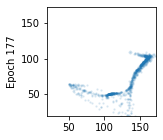

Reconstruction:


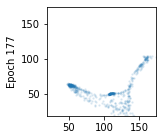

Epoch 178 elbo -10.355088


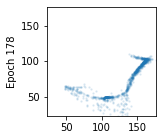

Reconstruction:


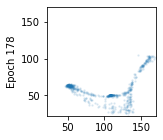

Epoch 179 elbo -10.420795


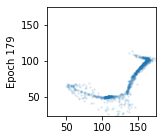

Reconstruction:


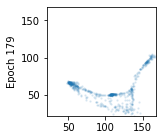

Epoch 180 elbo -10.439058


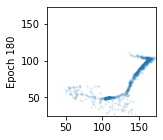

Reconstruction:


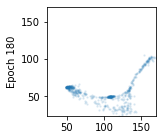

Epoch 181 elbo -10.372581


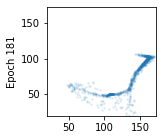

Reconstruction:


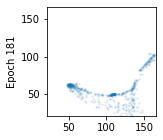

Epoch 182 elbo -10.378356


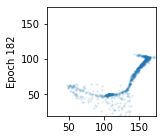

Reconstruction:


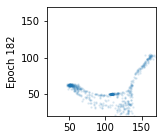

Epoch 183 elbo -10.454088


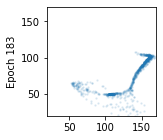

Reconstruction:


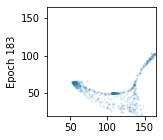

Epoch 184 elbo -10.298881


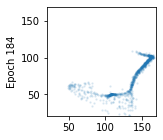

Reconstruction:


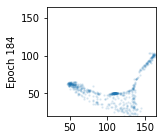

KeyboardInterrupt: 

In [6]:
samples, _ = make_decoder(prior.sample(1000), [2])
s1_5k, _ = make_decoder(prior.sample(1500), [2])
s2k, _ = make_decoder(prior.sample(2000), [2])
s3k, _ = make_decoder(prior.sample(3000), [2])
s5k, _ = make_decoder(prior.sample(5000), [2])
s10k, _ = make_decoder(prior.sample(10000), [2])

t1_5k = None
t2k = None
t3k = None
t5k = None
t10k = None

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(5000):
        test_elbo, test_codes, test_samples, test_loc, t1_5k, t2k, t3k, t5k, t10k = sess.run([elbo, code, samples, loc, s1_5k, s2k, s3k, s5k, s10k], {data: X_test})
        print('Epoch', epoch, 'elbo', test_elbo)
        plot(epoch, test_samples, size=2)
        print('Reconstruction:')
        plot(epoch, test_loc, size=2)
        for _ in range(600):
            indices = np.random.choice(X_train.shape[0], 128)
            batch = X_train[indices]
            sess.run(optimize, {data: batch})

In [10]:
def people_in_area(samples):
    in_area = []
    for sample in samples:
        x = sample[0]
        y = sample[1]
        if x > 130 and x < 150 and y > 50 and y < 70: in_area.append(sample)
    print(len(in_area))
   
people_in_area(test_samples)
people_in_area(t1_5k)
people_in_area(t2k)
people_in_area(t3k)
people_in_area(t5k)
people_in_area(t10k)

103
129
215
290
491
990
